<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/main/NN%20/ENB2012_data_NN_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Import dataset

dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/data/ENB2012_data.xlsx")


# Data exploration

In [52]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [53]:
dataset.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [54]:
dataset.shape

(768, 10)

In [55]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [57]:
dataset.isnull().sum() # No null values.

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [58]:
dataset.duplicated().sum() # No duplicated values.

0

In [59]:
# Split into independent and dependent varaibles.

X = dataset.iloc[:, :-2]

y = dataset.iloc[:, [-1,-2]]

In [60]:
print(X.shape)
print(y.shape)

(768, 8)
(768, 2)


In [61]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Check if there are any categorical columns

In [62]:
# Check of there are any categorical columns

X.select_dtypes(include='object').columns

Index([], dtype='object')

### Check for numberical columns

In [63]:
X.select_dtypes(include='number').columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

# Data visualization and distribution

## Correlation matrix for `numerical` columns

In [64]:
corr_matrix = dataset.select_dtypes(include = 'number').corr()
corr_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


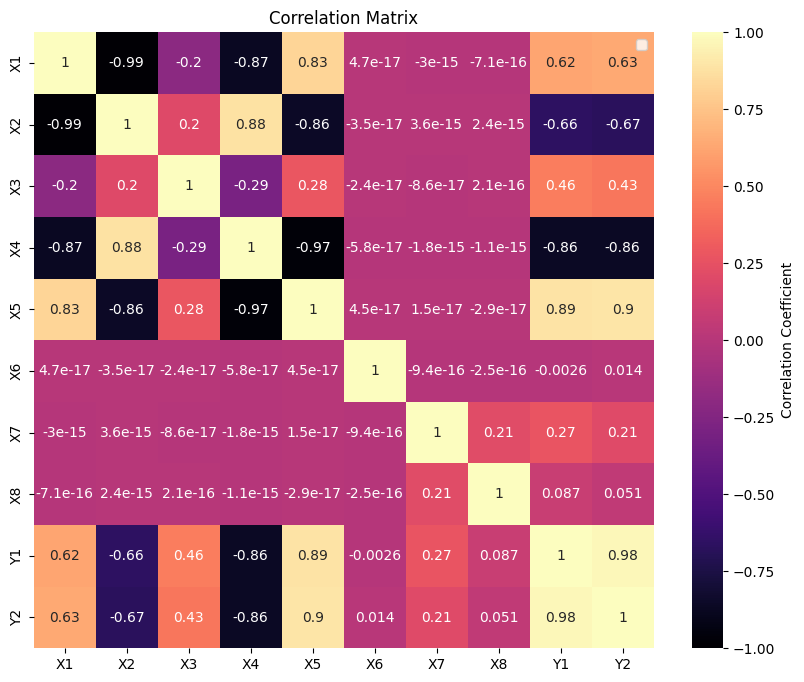

In [65]:
plt.figure(figsize = (10,8))
plt.legend()
sns.heatmap(corr_matrix, annot=True, cmap='magma', center=0, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'}) # other cmap options - magma, veridis , coolwarm
plt.title('Correlation Matrix')
plt.show()

#### Example interactive plot - still working

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
from ipywidgets import interact, FloatSlider
from IPython.display import display

# Sample data
np.random.seed(0)
df = pd.DataFrame(np.random.rand(10, 10), columns=[f'col{i}' for i in range(10)])

# Compute the correlation matrix
corr_matrix = df.corr()

# Function to update heatmap based on slider value
def update_heatmap(threshold):
    updated_corr_matrix = corr_matrix.copy()
    mask = np.abs(updated_corr_matrix) < threshold
    updated_corr_matrix[mask] = np.nan
    fig = px.imshow(updated_corr_matrix,
                    labels=dict(x="Columns", y="Columns", color="Correlation"),
                    x=updated_corr_matrix.columns,
                    y=updated_corr_matrix.columns,
                    color_continuous_scale='magma',
                    zmin=-1, zmax=1)
    fig.update_layout(title=f'Interactive Correlation Matrix (Threshold: {threshold})')
    fig.show()


# Slider widget for correlation threshold
threshold_slider = FloatSlider(value=0.0, min=-1.0, max=1.0, step=0.01, description='Threshold:')

# Create the initial heatmap
fig = px.imshow(corr_matrix,
                labels=dict(x="Columns", y="Columns", color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='magma',
                zmin=-1, zmax=1)
fig.update_layout(title='Interactive Correlation Matrix')
fig.show()



# # Display the interactive slider and heatmap
interact(update_heatmap, threshold=threshold_slider)


interactive(children=(FloatSlider(value=0.0, description='Threshold:', max=1.0, min=-1.0, step=0.01), Output()…

<function __main__.update_heatmap(threshold)>

## Numberical data distribution

### Histograms

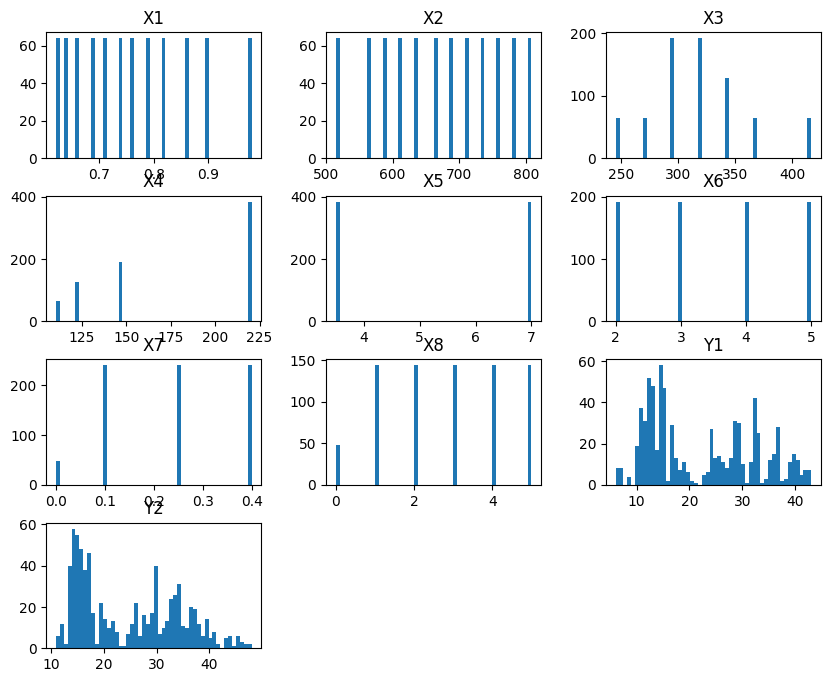

In [66]:
# Histograms for numberical data

dataset.select_dtypes(include = 'number').hist(bins = 50, figsize = (10, 8), grid = False)
plt.show()

### Density plots

Note:

The `subplot` function in Matplotlib allows you to create multiple plots (subplots) within a single figure.

 It arranges them in a grid layout, and you can specify the number of rows and columns in the grid as well as the position of each `subplot`.

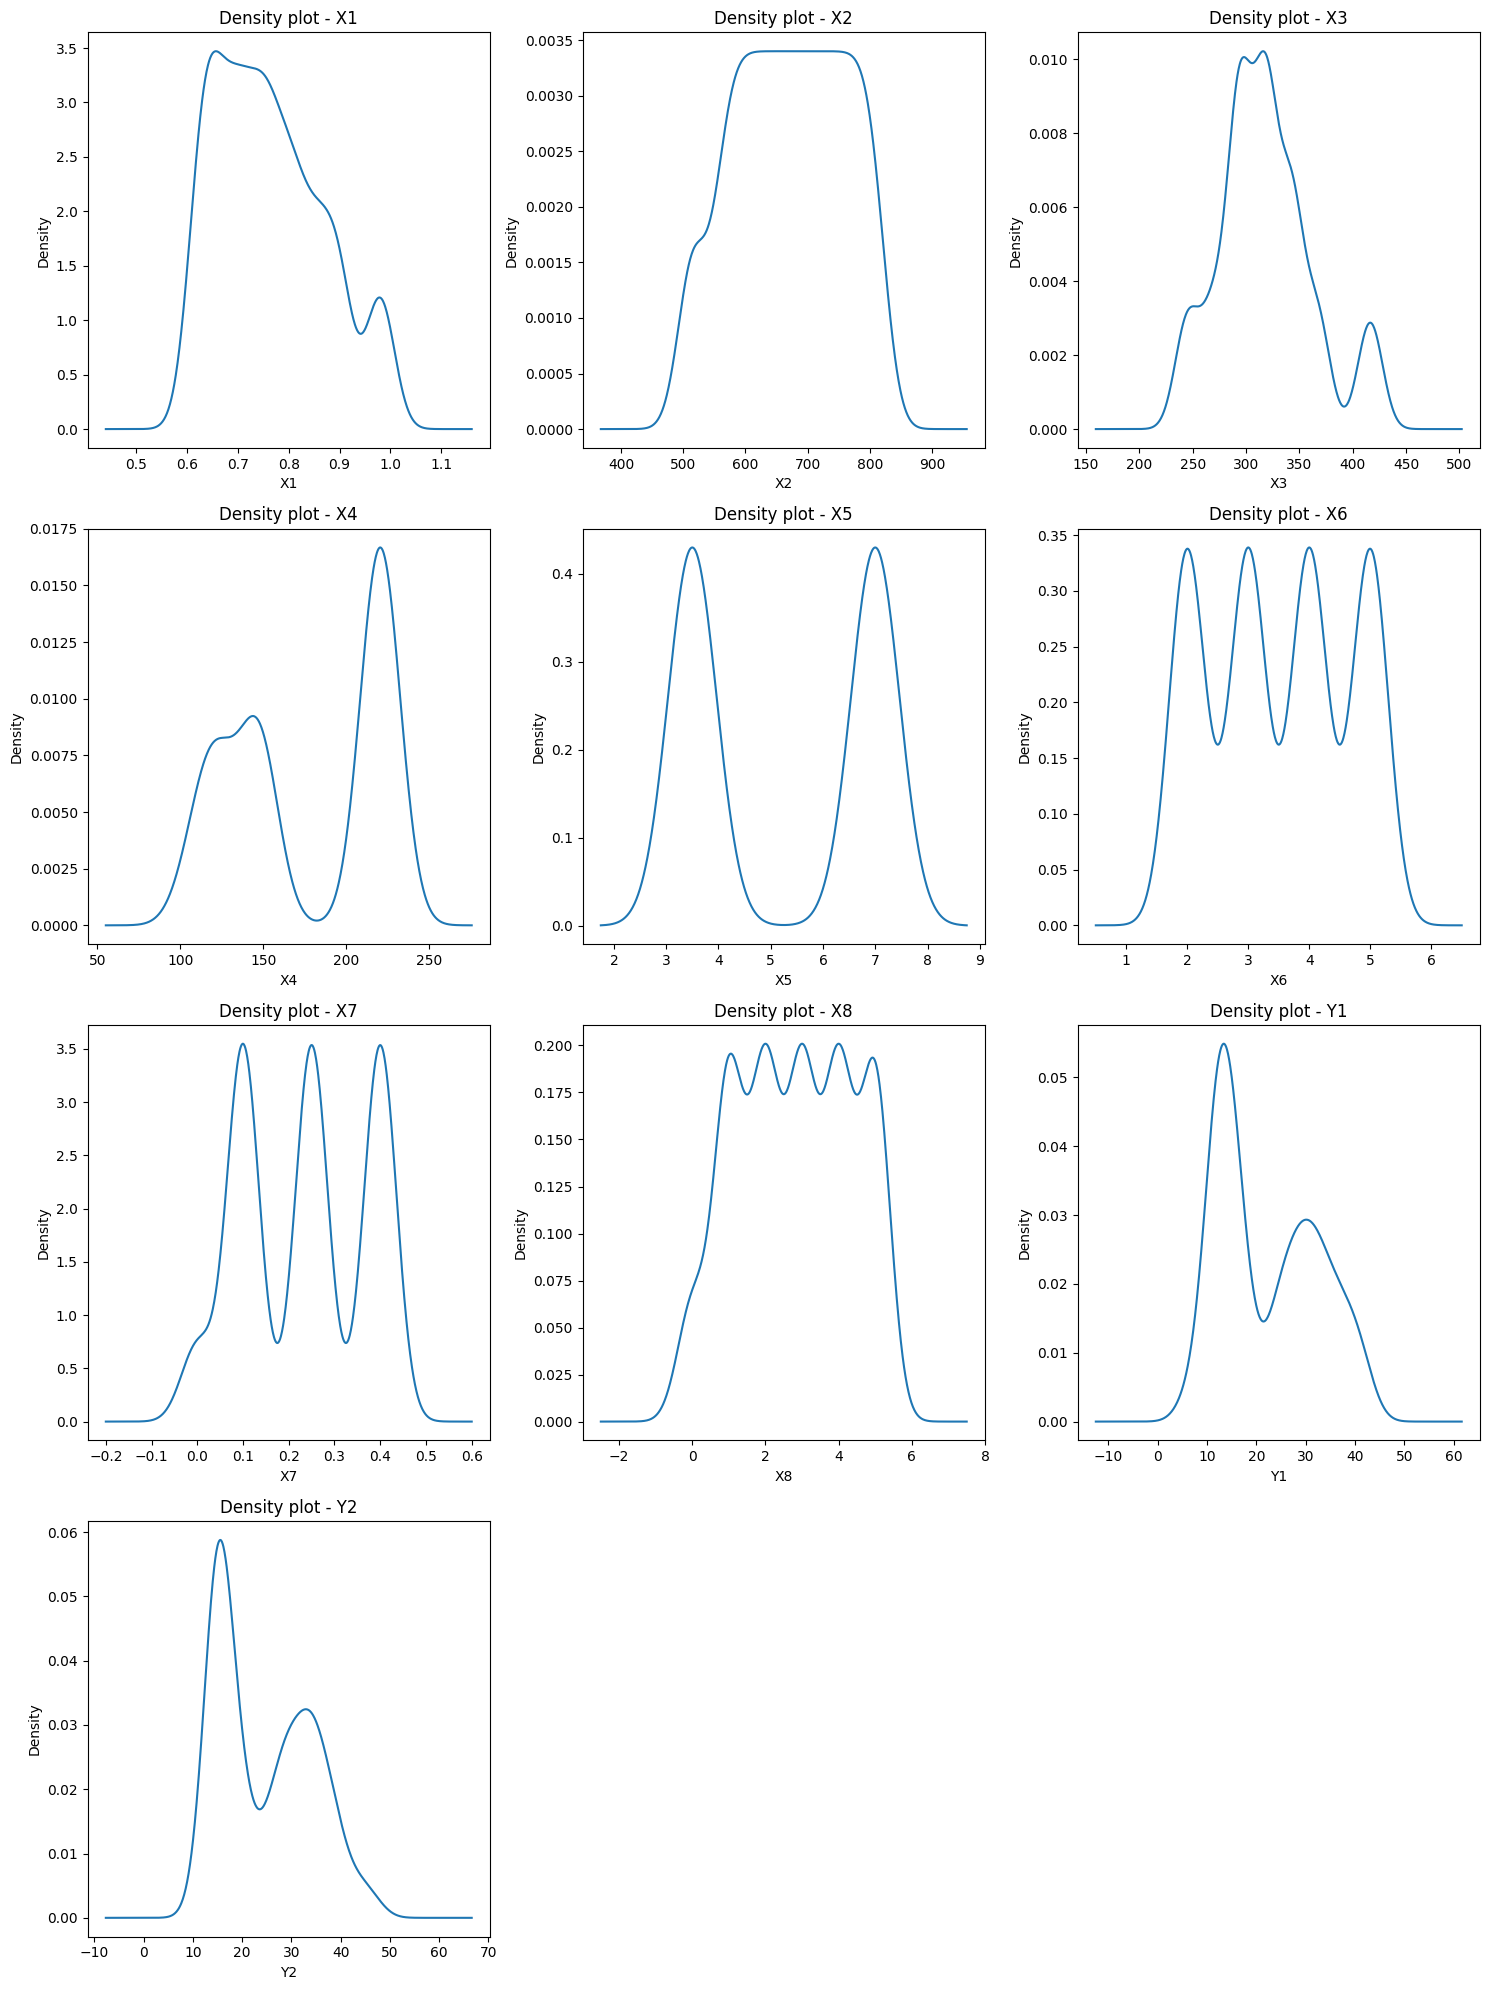

In [67]:
# Density pols for numerical columns
import math
columns_numerical = dataset.select_dtypes(include = 'number').columns
num_plots = len(columns_numerical)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)
plt.figure(figsize=(5 * num_cols, 5 * num_rows))

for i, col in enumerate(columns_numerical):
  plt.subplot(num_rows, num_cols, i + 1)
  dataset[col].plot.density()
  plt.xlabel(col)
  plt.ylabel("Density")
  plt.title("Density plot - " + col)

plt.tight_layout()
plt.show()


### Scatter plots -  between dependent variable and independent variable

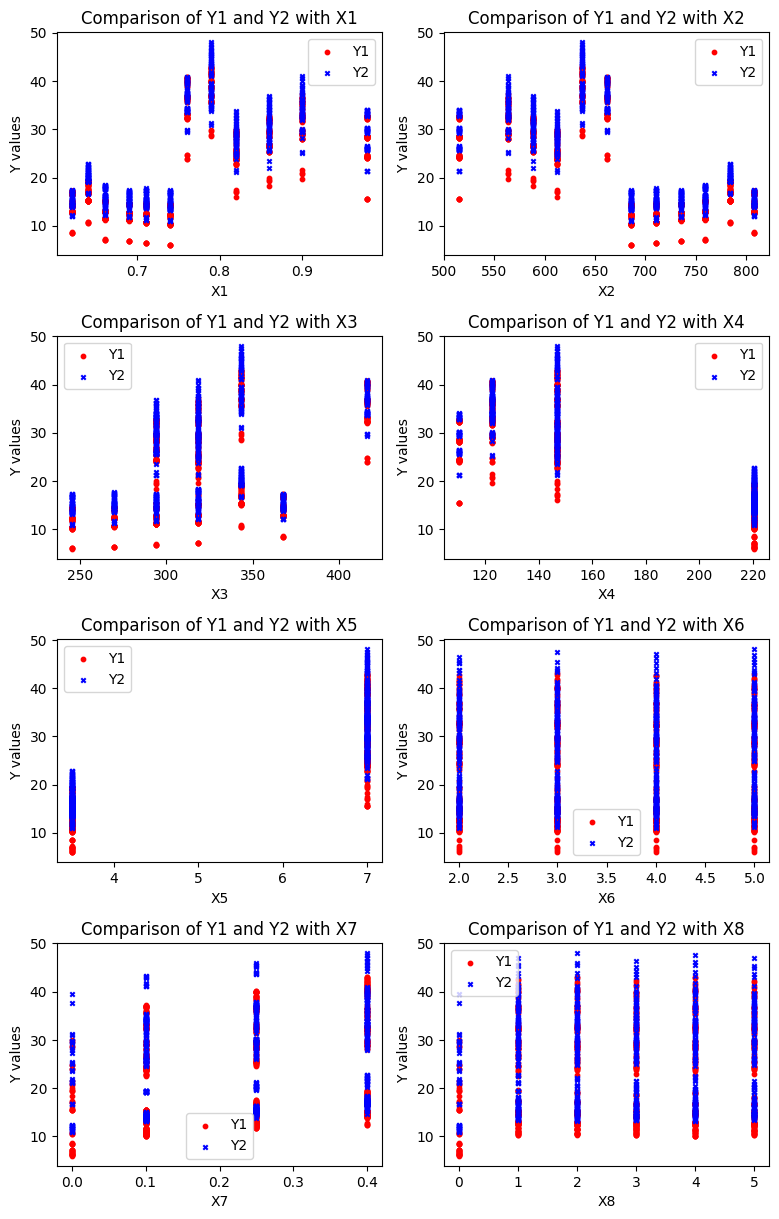

In [68]:
num_cols = 2
num_rows = math.ceil(16 / 2)
plt.figure(figsize=(4* num_cols, 3 * num_rows))
for i , col in enumerate(X.columns):
  plt.subplot(num_rows, num_cols, i + 1)
  plt.scatter(X[col], dataset['Y1'], color='r', marker = 'o', label = 'Y1', s = 10)
  plt.scatter(X[col], dataset['Y2'], color='b',  marker = 'x', label = 'Y2', s = 10)
  plt.legend()
  plt.xlabel(col)
  plt.ylabel("Y values")
  plt.title(f"Comparison of Y1 and Y2 with {col}")
plt.tight_layout()
plt.show()


Note :

Upon analyzing the plot, it becomes apparent that` Y1` and `Y2` exhibit a high degree of coherence in response to changes in the independent variables. Even without detailed information on their individual importance, it is clear that predicting one variable aids in understanding the corresponding output values of the other, given their striking similarity.










# Data Preprocessing
* Handling missing value - no need
* Encoding categorial varaibles - No need here
* Splitting training and testing set
* Feature scaling

## Splitting training and test set

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 2)
(154, 2)


### Feature scaling - training set


**Do we scale continuous dependent variables ( Target varaibles ) ?**
While scaling is typically applied to independent variables to standardize their range or distribution, dependent variables (targets) are generally left in their original form.

This approach ensures that the model focuses on learning patterns from the features while the targets retain their natural variation for prediction purposes.



**Why Scale Independent Variables Only?**

**Algorithm Sensitivity**: Many machine learning algorithms are sensitive to the scale of the input features. Scaling helps algorithms converge faster and avoids issues where some features might dominate solely based on their numeric range.


**Distance-Based Algorithms**: Algorithms that use distance measures (e.g., Euclidean distance) can be heavily influenced by the scale of features.







In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # instantiate StandardScaler class

sc.fit(X_train) # learn the parameters like mean and std for each column

X_train = sc.transform(X_train) # transform each column value


In [71]:
# Print X_train
X_train[:10, :]

array([[ 0.9131674 , -0.95838363, -0.53734712, -0.67069598,  1.01642146,
         1.37039857, -1.0061176 ,  0.77839976],
       [-1.36180044,  1.55277234,  1.13743019,  0.95700098, -0.98384385,
         1.37039857, -1.0061176 ,  1.42165339],
       [-0.69826816,  0.71572035, -0.53734712,  0.95700098, -0.98384385,
        -0.43523388, -1.0061176 ,  1.42165339],
       [-0.5086875 ,  0.43670302, -1.09560622,  0.95700098, -0.98384385,
         0.46758235,  0.11165599,  0.13514612],
       [-0.98263914,  0.99473768,  0.02091199,  0.95700098, -0.98384385,
        -1.33805011,  0.11165599,  0.77839976],
       [-1.36180044,  1.55277234,  1.13743019,  0.95700098, -0.98384385,
        -1.33805011,  1.22942959,  0.13514612],
       [ 1.2923287 , -1.23740096,  0.02091199, -1.21326163,  1.01642146,
         0.46758235,  0.11165599,  0.13514612],
       [-1.17221979,  1.27375501,  0.57917109,  0.95700098, -0.98384385,
        -1.33805011,  1.22942959,  0.77839976],
       [-1.17221979,  1.27375501

In [72]:
# scale X_test

X_test = sc.transform(X_test) # ndarray

In [73]:
X_test[:10, :]

array([[-1.36180044,  1.55277234,  1.13743019,  0.95700098, -0.98384385,
         1.37039857, -1.0061176 ,  0.77839976],
       [ 2.05065132, -1.79543563, -0.53734712, -1.48454445,  1.01642146,
         1.37039857, -1.0061176 ,  1.42165339],
       [-1.36180044,  1.55277234,  1.13743019,  0.95700098, -0.98384385,
        -1.33805011,  1.22942959,  1.42165339],
       [-0.22431652,  0.15768569, -1.65386532,  0.95700098, -0.98384385,
         0.46758235, -1.0061176 , -0.50810751],
       [-0.69826816,  0.71572035, -0.53734712,  0.95700098, -0.98384385,
        -0.43523388, -1.7513    , -1.79461478],
       [ 0.53400609, -0.6793663 ,  0.02091199, -0.67069598,  1.01642146,
         1.37039857,  1.22942959, -0.50810751],
       [ 2.05065132, -1.79543563, -0.53734712, -1.48454445,  1.01642146,
         0.46758235,  1.22942959, -1.15136115],
       [ 0.53400609, -0.6793663 ,  0.02091199, -0.67069598,  1.01642146,
        -1.33805011,  1.22942959,  0.77839976],
       [ 1.2923287 , -1.23740096

In [74]:
print(sc.mean_)
print(sc.scale_) # scale_ specifically shows the standard deviations before scaling occurred.

[7.63664495e-01 6.72153909e+02 3.17582248e+02 1.77285831e+02
 5.22149837e+00 3.48208469e+00 2.35016287e-01 2.78990228e+00]
[ 0.105496   87.80816563 43.88643169 45.15582569  1.74976789  1.10764513
  0.13419533  1.55459673]


In [75]:
np.mean(X.iloc[:, 1])

print(type(X))
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


# Feedforward NN and prediction

##  1. Instantiate Sequential model - Fully connected NN

In [76]:
def create_model(num_input_var, num_output_var , type = 'sigmoid'):
  # instantiate
  model =  tf.keras.Sequential() # Instantiate Sequential class
  # Add layers
  model.add(tf.keras.layers.Dense(units = 10, activation = 'relu', input_shape = (num_input_var, )))
  model.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
  model.add(tf.keras.layers.Dense(units = num_output_var, activation = type))
  # compile model

  lossType = tf.keras.losses.MSE
  metricsType=[tf.keras.metrics.MeanAbsoluteError(),
                     tf.keras.metrics.RootMeanSquaredError()]
  if(type == 'sigmoid'):
    lossType = tf.keras.losses.BinaryCrossentropy()
    metricsType=[tf.keras.metrics.Accuracy,
                     tf.keras.metrics.FalseNegatives()]
  elif(type == 'softmax'):
    lossType = tf.keras.losses.CategoricalCrossentropy()
    metricsType=[tf.keras.metrics.Accuracy,
             tf.keras.metrics.FalseNegatives()]

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss = lossType,
                metrics = metricsType)
  return model


In [77]:
import tensorflow as tf

ann = tf.keras.Sequential() # Instantiate Sequential class

## 2. Add hidden layers and output layers

Note:


In neural networks (NN), when the output layer is intended to predict continuous values (as in regression tasks), `it is common to use a linear activation function for the output layer`.

### A linear activation function means that the output is a linear combination of the inputs to the output layer, which allows the network to produce a wide range of values without being constrained to a specific interval.


In [78]:
# 1st hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu', input_shape=(8,)))  # 1st hidden layer with 6 units and 8 as shape because of input features. - weights and biases = 48 + 6 = 54

# 2nd hidden layer
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))  # 2nd hidden layer with 4 units. - 4 * 6 = 24 + 4 = 28

# adding output layer
ann.add(tf.keras.layers.Dense(units = 2, activation = 'linear'))  # 3rd output layer with 2 units as there are 2 target variables. 2 * 4 + 2 = 10


## 3. Compiling the NN

Setting up necessary components like
- cost function, - MSE
- learning rate, - 0.001
- evaluation metrics - Accuracy , F1 score

In [79]:
ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.MSE,
            metrics=[tf.keras.metrics.MeanAbsoluteError(),
                     tf.keras.metrics.RootMeanSquaredError()])

In [80]:
# Get the initial weights and save them

initial_weights = ann.get_weights()

print(initial_weights) # Weights for each layer and baises


[array([[-0.281321  ,  0.14349115, -0.09199077,  0.54261804, -0.06460905,
         0.5942365 ],
       [-0.61635077,  0.33642185,  0.50066936,  0.5449426 ,  0.548568  ,
        -0.4621197 ],
       [-0.48682243,  0.5172032 ,  0.2180143 ,  0.43209612,  0.02047133,
         0.5118493 ],
       [ 0.1408552 ,  0.4647559 ,  0.6322533 , -0.41715944,  0.6450498 ,
        -0.16966334],
       [-0.22996393,  0.15102005, -0.21116826, -0.4270764 ,  0.13736588,
         0.6414306 ],
       [ 0.258977  ,  0.63139653, -0.20070392,  0.04785371, -0.17972016,
         0.0581212 ],
       [ 0.02906096,  0.50786436,  0.32967728,  0.2619803 , -0.6352897 ,
        -0.6378582 ],
       [-0.61295134,  0.49122393,  0.16978103,  0.47351718, -0.35575226,
         0.17423517]], dtype=float32), array([0., 0., 0., 0., 0., 0.], dtype=float32), array([[-0.70069087, -0.22802168,  0.17419332,  0.15031219],
       [ 0.63741875, -0.17732137,  0.5710614 ,  0.4546224 ],
       [ 0.39388096,  0.13840008, -0.16025364,  0.66

## 4. Training ANN on training set

In [81]:
# Train the model
ann.fit(X_train, y_train, batch_size=36, epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 3ms/step - loss: 619.7256 - mean_absolute_error: 22.8333 - root_mean_squared_error: 24.8943
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 612.3688 - mean_absolute_error: 22.6725 - root_mean_squared_error: 24.7461
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 604.2451 - mean_absolute_error: 22.4911 - root_mean_squared_error: 24.5814
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 595.0638 - mean_absolute_error: 22.2810 - root_mean_squared_error: 24.3939
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 584.7355 - mean_absolute_error: 22.0400 - root_mean_squared_error: 24.1813
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 573.1973 - mean_absolute_error: 21.7612 - root_mean_squared_error: 23.9415
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 560.1618 - mean_absolute_error: 21.4444

In [ ]:
# Reset weights and train again - if needed
# ann.set_weights(initial_weights)

In [82]:
# get weights after training the model

trained_weights = ann.get_weights()

print(trained_weights)

[array([[-0.38748834, -0.03024664, -0.42468557,  0.92837435, -0.36472747,
         0.47376385],
       [-0.79583913,  0.05698823,  0.7650661 ,  0.54908526,  0.577794  ,
        -0.61588156],
       [-0.162401  ,  1.1982958 , -0.3204781 ,  1.1766559 , -0.1850237 ,
         1.3341497 ],
       [-0.2034788 , -0.12202379,  0.9871928 , -0.9153117 ,  0.7827097 ,
        -0.52742577],
       [ 0.94718325,  1.5362217 , -0.5453752 , -0.8739112 ,  0.685562  ,
         1.6715592 ],
       [ 0.2487915 ,  0.40590715,  0.22040534,  0.1898858 , -0.5072867 ,
        -0.39482388],
       [ 0.8749066 ,  0.78479105,  0.7148086 ,  0.31848118, -0.6178195 ,
        -0.09953834],
       [-0.6506299 ,  0.4537157 ,  0.6161265 ,  0.32493627, -0.35655263,
         0.48833516]], dtype=float32), array([ 1.1501353,  1.1544379,  0.4641813, -0.1470627,  1.2465743,
        1.0279951], dtype=float32), array([[-0.28653902,  0.4829241 ,  1.013825  ,  0.8002404 ],
       [ 0.89886194,  0.68174106,  1.4669397 ,  1.2574596 

In [83]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 54        
                                                                 
 dense_7 (Dense)             (None, 4)                 28        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 92 (368.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualization of decision boundaries



Visualization of decision boundaries is a powerful technique in machine learning, particularly for models with low-dimensional input spaces, such as those with two or three features. Decision boundaries help us understand how a trained model makes predictions and separates different classes or categories in the input feature space.

**Understanding Decision Boundaries:**

**Definition**: A decision boundary is a hypersurface that partitions the input feature space into regions, each associated with a different class or category. For binary classification, it divides the space into regions where the model predicts one class versus another.

**Types of Models**: Decision boundaries are commonly visualized for models like logistic regression, support vector machines (SVMs), and various types of neural networks. The shape and complexity of the decision boundary depend on the model's architecture and the characteristics of the data.

Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 670.8141 - mean_absolute_error: 24.1173 - root_mean_squared_error: 25.9001
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 662.9523 - mean_absolute_error: 23.9616 - root_mean_squared_error: 25.7479
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 653.8903 - mean_absolute_error: 23.7808 - root_mean_squared_error: 25.5713
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 643.0256 - mean_absolute_error: 23.5668 - root_mean_squared_error: 25.3579
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 629.8926 - mean_absolute_error: 23.3041 - root_mean_squared_error: 25.0977
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 613.3757 - mean_absolute_error: 22.9688 - root_mean_squared_error: 24.7664
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 588.9337 - mean_absolute_error: 22.4755

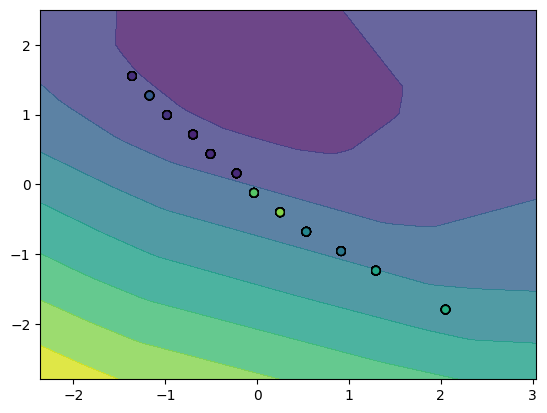

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model = create_model(2, 1, 'linear')
y_train_selected = y_train.iloc[:, 0]


# Train the model with data having only 2 features (for simplicity in this example)
# X_train should be a dataset with only 2 features
# y_train should be the corresponding labels
model.fit(X_train[:, :2], y_train_selected, batch_size=36, epochs=100)

# Assuming `model` is your trained model and `X_train` is your training data
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_selected, edgecolors='k', marker='o')
plt.show()


In [ ]:
type(y_train)

pandas.core.frame.DataFrame

## 5. Predicting on test set

In [84]:
y_predicted = ann.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [85]:
type(y_predicted)

numpy.ndarray

In [ ]:
print(y_predicted)

[[15.608491  12.501314 ]
 [27.921131  26.387281 ]
 [20.393248  18.641363 ]
 [13.321696  10.390001 ]
 [13.458424  10.202036 ]
 [35.262337  33.333607 ]
 [34.060688  32.934174 ]
 [35.878498  33.62075  ]
 [36.839916  34.567055 ]
 [15.817836  14.442807 ]
 [14.291604  11.714703 ]
 [24.831121  21.957838 ]
 [31.279186  29.713535 ]
 [35.292046  33.469753 ]
 [30.511356  28.102684 ]
 [34.05306   31.749094 ]
 [13.413756  10.538187 ]
 [16.048285  14.652557 ]
 [15.840617  13.570248 ]
 [26.4884    24.901133 ]
 [14.476313  11.848095 ]
 [16.30937   14.334838 ]
 [18.110481  16.683428 ]
 [14.460822  12.451317 ]
 [35.65711   34.219685 ]
 [15.45271   12.487202 ]
 [17.610151  16.0272   ]
 [18.486795  16.971157 ]
 [35.926678  34.19049  ]
 [27.923817  25.390944 ]
 [17.944965  15.519636 ]
 [36.523033  34.386868 ]
 [43.80578   41.099606 ]
 [26.691387  24.816256 ]
 [16.577213  15.187127 ]
 [30.409409  29.532423 ]
 [15.58681   12.425673 ]
 [14.159231  11.19649  ]
 [43.512554  41.024105 ]
 [26.979067  24.538557 ]


In [86]:
# Comparing Predicted values vs actual values

# Ensure y_predicted and y_test have the same shape
assert y_predicted.shape == y_test.shape, "Shapes of predicted and actual values must match."

# Number of target variables
num_targets = y_predicted.shape[1]

# Create a dictionary to hold data for the DataFrame
data = {}
for i in range(num_targets):
    data[f'Predicted_Target_{i+1}'] = y_predicted[:, i]
    data[f'Actual_Target_{i+1}'] = y_test.iloc[:, i]

# Create DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


     Predicted_Target_1  Actual_Target_1  Predicted_Target_2  Actual_Target_2
239           15.558544            14.47           13.032053            13.00
243           27.479502            26.18           25.900869            24.26
764           19.858847            16.88           17.310682            16.54
122           12.403026            13.57           10.148451            10.32
33            13.291886            12.05           10.489580             6.79
..                  ...              ...                 ...              ...
675           34.691669            33.88           33.230206            32.74
8             24.747925            27.30           20.651293            19.50
596           41.791817            39.48           40.041378            40.78
521           17.748247            20.01           15.019825            16.86
662           20.096933            18.10           17.828966            14.72

[154 rows x 4 columns]


### Scatter plot between predicted and actual labels.

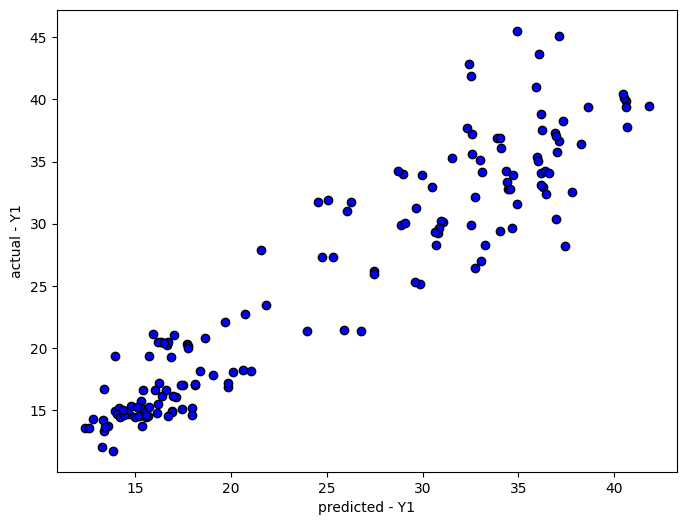

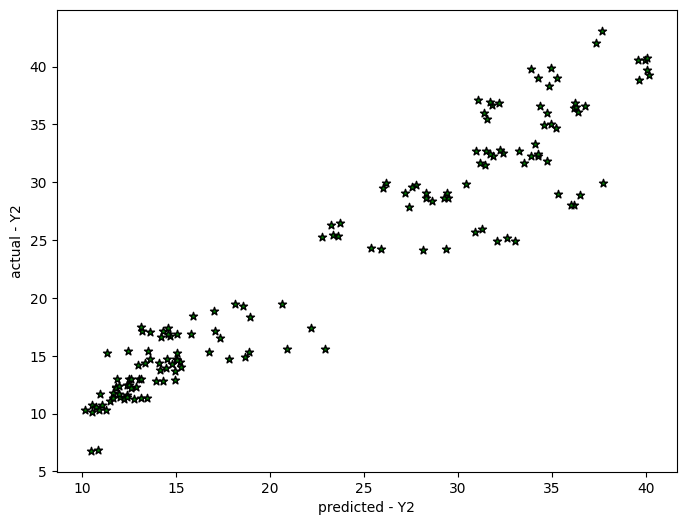

In [93]:
y_predicted_y1 = y_predicted[:, 0]
y_test_y1 = y_test.iloc[:, 0]

plt.figure(figsize=(8, 6))
plt.scatter(y_predicted_y1, y_test_y1, edgecolors='k', marker='o', color='blue')
plt.xlabel('predicted - Y1')
plt.ylabel('actual - Y1')
plt.show()

y_predicted_y2 = y_predicted[:, 1]
y_test_y2 = y_test.iloc[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(y_predicted_y2, y_test_y2, edgecolors='k', marker='*', color='green')
plt.xlabel('predicted - Y2')
plt.ylabel('actual - Y2')
plt.show()


In [91]:
# Ensure y_predicted and y_test have the same shape
assert y_predicted.shape == y_test.shape, "Shapes of predicted and actual values must match."

# Number of target variables
num_targets = y_predicted.shape[1]

# Calculate RMSE for each target
rmses = []
for i in range(num_targets):
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test.iloc[:, i], y_predicted[:, i]))
    rmses.append(rmse)
    print(f'Root Mean Squared Error for Target {i+1}: {rmse}')


Root Mean Squared Error for Target 1: 3.309414023168719
Root Mean Squared Error for Target 2: 2.9184651049876362
